# Right angle triangle fractal (software)

This notebook will illustrate a right angled triangle fractal that behaves similary to the Sierpinski's triangle fractal. 

Like Sierpinkski's triangle this fractal is created, through recursion, by halfing the size of the original triangle's height and length. 

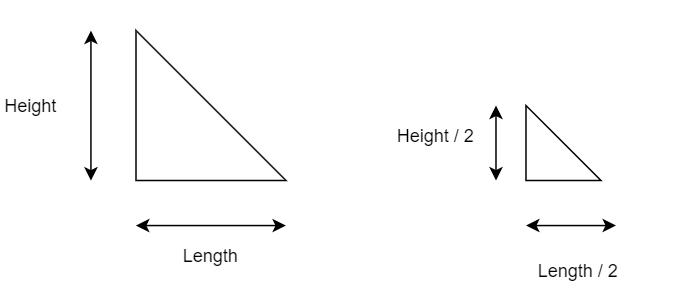

These new lengths are the size of our new triangles which we need 3 of. They are alligned as shown, note how the allignment has the same dimensions as the original triangle 

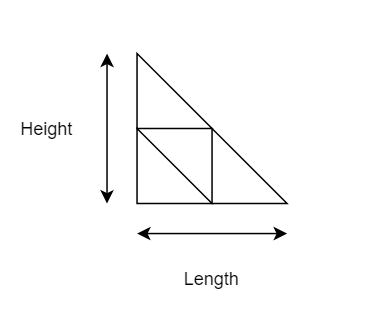

NOTE: This Notebook makes use of the resizer IP, as seen in the Pynq community example "Hello world resizer". See refrences in final cell

# Import libraries

In [1]:
from ipywidgets import *
from PIL import Image, ImageEnhance, ImageDraw, ImageColor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load image

In [2]:
image_path = "images/RAT.png"
original_image = Image.open(image_path)

# Create canvas to display image

Note the dimensions of the original image as the final fractal should have the same saze

Image size: 360x360 pixels.


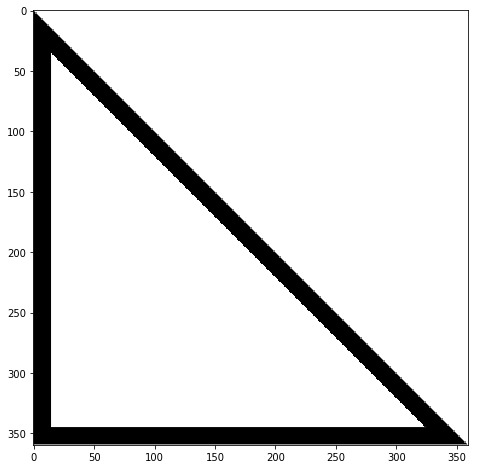

In [3]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))
_ = plt.imshow(original_image)

# Create slider

A slider is created so the user can select the number of iterations they want to execute for the fractal. To operate the slider run this cell then select desired number.

In [5]:
def update(limit):
    
    limit = limit
    
    

limit=widgets.IntSlider(min=1,max=5,step=1)

interact(update, limit=limit);

interactive(children=(IntSlider(value=1, description='limit', max=5, min=1), Output()), _dom_classes=('widget-…

We now cast the slider limit value to an integer, this way it can be used for the number of times the for loop executes

In [6]:
limitIntValue = int(limit.value)

In the following cell, first, we can see that the limit value obtained from the slider in the previous cell is set as the iterations for a for loop. Based of this number the for loop will execute and resize our image the required number of times.

The box variables are a tuple that sets the co-ordinates of the resized images. We then paste these boxes to the original image to create our fractal.

# Create fractal

In [7]:
for n in range(limitIntValue):
    
            new_width = int(old_width / 2)     # Determine new width and height for resized image
            new_height = int(old_height / 2)
          
            u = int(new_width / 2)             # Variables to allign top triangle with bottom two
            v = int(3 * new_width / 2)
            
            box = (0, 0, new_width, new_height) # Box co-ordinates for positioning resized images
            box2 = (0, new_height, new_width, 2 * new_height)
            box3 = (new_width, new_height, 2 * new_width, 2 * new_height)

            new = original_image.resize((new_width, new_height))
           
            original_image.paste(new, box)    # Paste resized images to create fractal
            original_image.paste(new, box2)
            original_image.paste(new, box3)

# Display fractal

Note the dimensions of the fractal match the original image

Image size: 360x360 pixels. 2


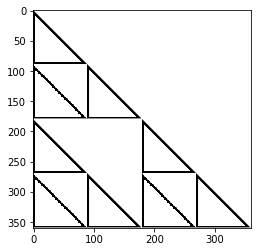

In [8]:
enhancer = ImageEnhance.Sharpness(original_image.convert("RGB"))
print("Image size: {}x{} pixels.".format(old_width, old_height), Image.BILINEAR)
_ = plt.imshow(original_image)

In [9]:
%%timeit

for n in range(limitIntValue):
    
            new_width = int(old_width / 2)     # Determine new width and height for resized image
            new_height = int(old_height / 2)
          
            u = int(new_width / 2)             # Variables to allign top triangle with bottom two
            v = int(3 * new_width / 2)
            
            box = (0, 0, new_width, new_height) # Box co-ordinates for positioning resized images
            box2 = (0, new_height, new_width, 2 * new_height)
            box3 = (new_width, new_height, 2 * new_width, 2 * new_height)

            new = original_image.resize((new_width, new_height))
           
            original_image.paste(new, box)    # Paste resized images to create fractal
            original_image.paste(new, box2)
            original_image.paste(new, box3)

100 loops, best of 3: 18.4 ms per loop


# Refrences

https://github.com/Xilinx/PYNQ-HelloWorld

https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks_advanced_features.ipynb

https://pillow.readthedocs.io/en/3.1.x/index.html

https://github.com/Xilinx/PYNQ/blob/master/docs/source/python_environment.ipynb